In [57]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import keras.preprocessing



(256, 256, 3)


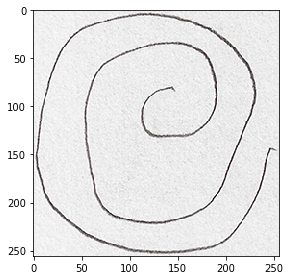

In [14]:
#reading the image
img =cv2.imread('dataset/spiral/testing/healthy/V01HE01.png')
imshow(img)
print(img.shape)



(256, 256)


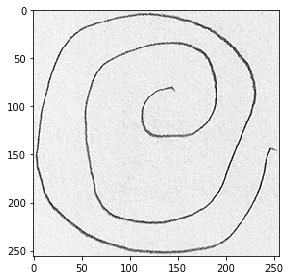

In [15]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imshow(img)
print(img.shape)

(200, 200)


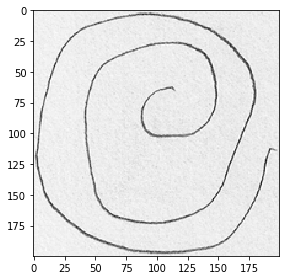

In [16]:
img = cv2.resize(img,(200,200))
imshow(img)
print(img.shape)

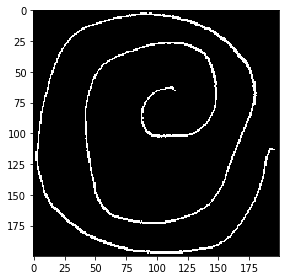

In [19]:

imshow(cv2.threshold(img, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1])
img = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
print(img.shape)

In [34]:
(features,hog_img) = hog(img,orientations=9,
                          pixels_per_cell=(6,6),cells_per_block=(2,2),
                          transform_sqrt=True, block_norm="L2",visualize=True)

hogImage = exposure.rescale_intensity(hog_img, out_range=(0, 255))
hogImage = hogImage.astype("uint8")

cv2.imshow("HOG Image", hogImage)
cv2.waitKey(0)



13

In [43]:
img1 =cv2.imread('/Users/ronakpatel/Projects/Parkinson_Desease_Detect/dataset/spiral/testing/parkinson/V02PE01.png')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1,(200,200))
img1 = cv2.threshold(img1, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
(features,hog_img) = hog(img1,orientations=9,
                          pixels_per_cell=(2,2),cells_per_block=(2,2),
                          transform_sqrt=True, block_norm="L2",visualize=True)

hogImage = exposure.rescale_intensity(hog_img, out_range=(0, 255))
hogImage = hogImage.astype("uint8")

cv2.imshow("HOG Image", hogImage)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_datagen = keras.preprocessing.image.ImageDataGenerator(  
                                             rotation_range=180, 
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2,   
                                             horizontal_flip=True, 
                                             vertical_flip=True, 
                                             )


In [64]:
train_generator = img_datagen.flow_from_directory(
            directory = '/Users/ronakpatel/Projects/Parkinson_Desease_Detect/dataset/spiral/training/healthy/',
            save_to_dir= "/Users/ronakpatel/Projects/augmented_images/",
    class_mode='binary'
)


Found 0 images belonging to 0 classes.


In [74]:
aug_iter = img_datagen.flow

for i in range(1):
    
    # convert to unsigned integers for plotting
    image = next(train_generator)[0].astype('uint8')
    print(image.shape)
    cv2.imshow("sdsd",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
          
    
    

  

(0, 256, 256, 3)


error: OpenCV(4.5.2) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-kkkcs6ro/opencv/modules/highgui/src/window.cpp:404: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [77]:
import os

collection = "/Users/ronakpatel/Projects/Parkinson_Desease_Detect/dataset/spiral/training/healthy"
for i, filename in enumerate(os.listdir(collection)):
    os.rename("/Users/ronakpatel/Projects/Parkinson_Desease_Detect/dataset/spiral/training/healthy/" + filename, 
              "/Users/ronakpatel/Projects/Parkinson_Desease_Detect/dataset/" + "SP_" + str(i) + "_0" + ".png")

    
    
    

In [78]:

collection = "/Users/ronakpatel/Projects/Parkinson_Desease_Detect/dataset/spiral/training/parkinson"
for i, filename in enumerate(os.listdir(collection)):
    os.rename("/Users/ronakpatel/Projects/Parkinson_Desease_Detect/dataset/spiral/training/parkinson/" + filename, 
              "/Users/ronakpatel/Projects/Parkinson_Desease_Detect/dataset/" + "SP_" + str(i) + "_1" + ".png")

    
    

